<a href="https://colab.research.google.com/github/DolevSeren/DI-Bootcamp/blob/main/Binary%20Text%20Classification%20With%20IMDB%20Dataset%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow import keras

# טוענים את הדאטה (רק 10,000 המילים הכי שכיחות)
(train_data, train_labels), (test_data, test_labels) = keras.datasets.imdb.load_data(num_words=10000)


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))  # יוצרים מטריצה מלאה באפסים
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.0  # שמים 1 במקומות שבהם מופיעות מילים בביקורת
    return results


In [7]:
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


In [8]:
x_val = x_train[:10000]             # 10,000 ביקורות לוולידציה
partial_x_train = x_train[10000:]   # השאר – אימון

y_val = y_train[:10000]
partial_y_train = y_train[10000:]


In [9]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [11]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [12]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=512,
    validation_data=(x_val, y_val)
)


Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 84ms/step - accuracy: 0.6825 - loss: 0.5990 - val_accuracy: 0.8659 - val_loss: 0.3937
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.8971 - loss: 0.3363 - val_accuracy: 0.8860 - val_loss: 0.3114
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9198 - loss: 0.2498 - val_accuracy: 0.8831 - val_loss: 0.2939
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.9411 - loss: 0.1914 - val_accuracy: 0.8906 - val_loss: 0.2749
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 2s 51ms/step - accuracy: 0.9520 - loss: 0.1607 - val_accuracy: 0.8836 - val_loss: 0.2887
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.9591 - loss: 0.1388 - val_accuracy: 0.8721 - val_loss: 0.3204
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9609 - loss: 0.1263 - val_accuracy: 0.8851 - val_loss: 0.2963
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9729 - loss: 0.0973 - val_accuracy: 0.8847 - v

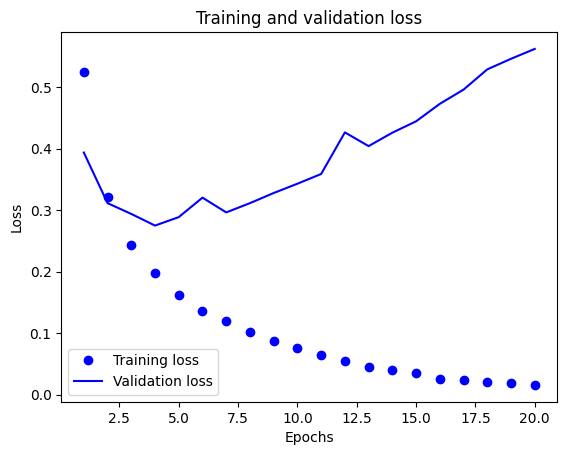

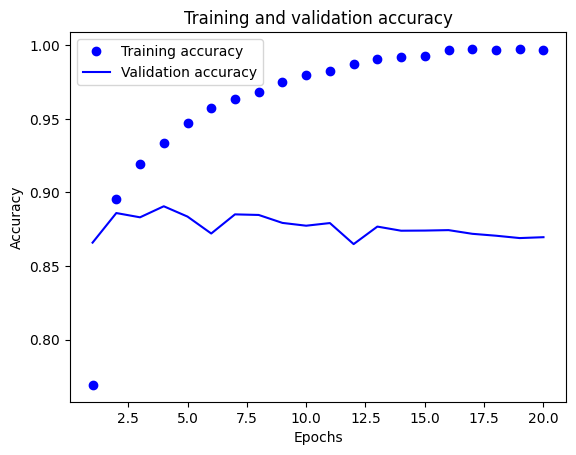

In [13]:
import matplotlib.pyplot as plt

history_dict = history.history

loss = history_dict["loss"]
val_loss = history_dict["val_loss"]
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]

epochs = range(1, len(loss) + 1)

# גרף איבוד
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

# גרף דיוק
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [14]:
for i in range(len(loss)):
    print(f"Epoch {i+1} - val_loss: {val_loss[i]:.4f}, val_accuracy: {val_acc[i]:.4f}")


Epoch 1 - val_loss: 0.3937, val_accuracy: 0.8659
Epoch 2 - val_loss: 0.3114, val_accuracy: 0.8860
Epoch 3 - val_loss: 0.2939, val_accuracy: 0.8831
Epoch 4 - val_loss: 0.2749, val_accuracy: 0.8906
Epoch 5 - val_loss: 0.2887, val_accuracy: 0.8836
Epoch 6 - val_loss: 0.3204, val_accuracy: 0.8721
Epoch 7 - val_loss: 0.2963, val_accuracy: 0.8851
Epoch 8 - val_loss: 0.3114, val_accuracy: 0.8847
Epoch 9 - val_loss: 0.3279, val_accuracy: 0.8793
Epoch 10 - val_loss: 0.3430, val_accuracy: 0.8774
Epoch 11 - val_loss: 0.3588, val_accuracy: 0.8792
Epoch 12 - val_loss: 0.4264, val_accuracy: 0.8649
Epoch 13 - val_loss: 0.4041, val_accuracy: 0.8768
Epoch 14 - val_loss: 0.4259, val_accuracy: 0.8740
Epoch 15 - val_loss: 0.4444, val_accuracy: 0.8741
Epoch 16 - val_loss: 0.4729, val_accuracy: 0.8744
Epoch 17 - val_loss: 0.4959, val_accuracy: 0.8719
Epoch 18 - val_loss: 0.5289, val_accuracy: 0.8706
Epoch 19 - val_loss: 0.5461, val_accuracy: 0.8690
Epoch 20 - val_loss: 0.5621, val_accuracy: 0.8696


In [15]:
# בונים מודל חדש מאפס
model = keras.Sequential([
    layers.Dense(16, activation="relu", input_shape=(10000,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

# מתאמנים על כל הדאטה – x_train כולל את ה-validation מהשלב הקודם
model.fit(
    x_train,
    y_train,
    epochs=4,
    batch_size=512
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.7351 - loss: 0.5646
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.9022 - loss: 0.2938
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.9241 - loss: 0.2195
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.9339 - loss: 0.1874


In [16]:
# הערכת ביצועים על test set
results = model.evaluate(x_test, y_test)
print(f"Test Loss: {results[0]:.4f}")
print(f"Test Accuracy: {results[1]:.4f}")


782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8846 - loss: 0.2851
Test Loss: 0.2826
Test Accuracy: 0.8875
